## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [177]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [178]:
#header =1 takes header as first row of dataset
df=pd.read_csv("Algerian_forest_fires_dataset.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [179]:
#Region Mapping
#Bejaia Region Dataset =0
#Sidi-Bel Abbes Region=1
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [183]:
df[df.isna().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [182]:
df.drop([122,123],inplace=True)
df[df['FWI'].str.contains('fire')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [184]:
#Fix Spaces in column name
print(df.columns)
df.columns=df.columns.str.strip()
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [186]:
#pd.to_numeric is designed to process 1D arrays (like a single Series) and does not natively handle 2D DataFrames.
# Below is correct
#df.iloc[:,1]=pd.to_numeric(df.iloc[:,1])
#Below is wrong
#df.iloc[:,:-1]=pd.to_numeric(df.iloc[:,:-1])
#Alternatively 
# Apply to_numeric to all columns except the last one
#df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')


#changing to column type to int

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.5+ KB


In [187]:
#Chaging to float using generic way
object= [ feature  for feature in df.columns if df[feature].dtype=='O']
object

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [188]:
for i in object:
    if i!='Classes':
        df[i]=pd.to_numeric(df[i],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.5+ KB


In [189]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [192]:
#lets save clean dataset
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv",index=False)

In [193]:
#drop day month year
df.drop(['day','month','year'],axis=1,inplace=True)

In [194]:
#There are different types of fire and not fire
df["Classes"].value_counts()

Classes
fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [195]:
df["Classes"]=np.where(df['Classes'].str.strip().str.lower()=='not fire',0,1)

df["Classes"].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

## Visualization

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

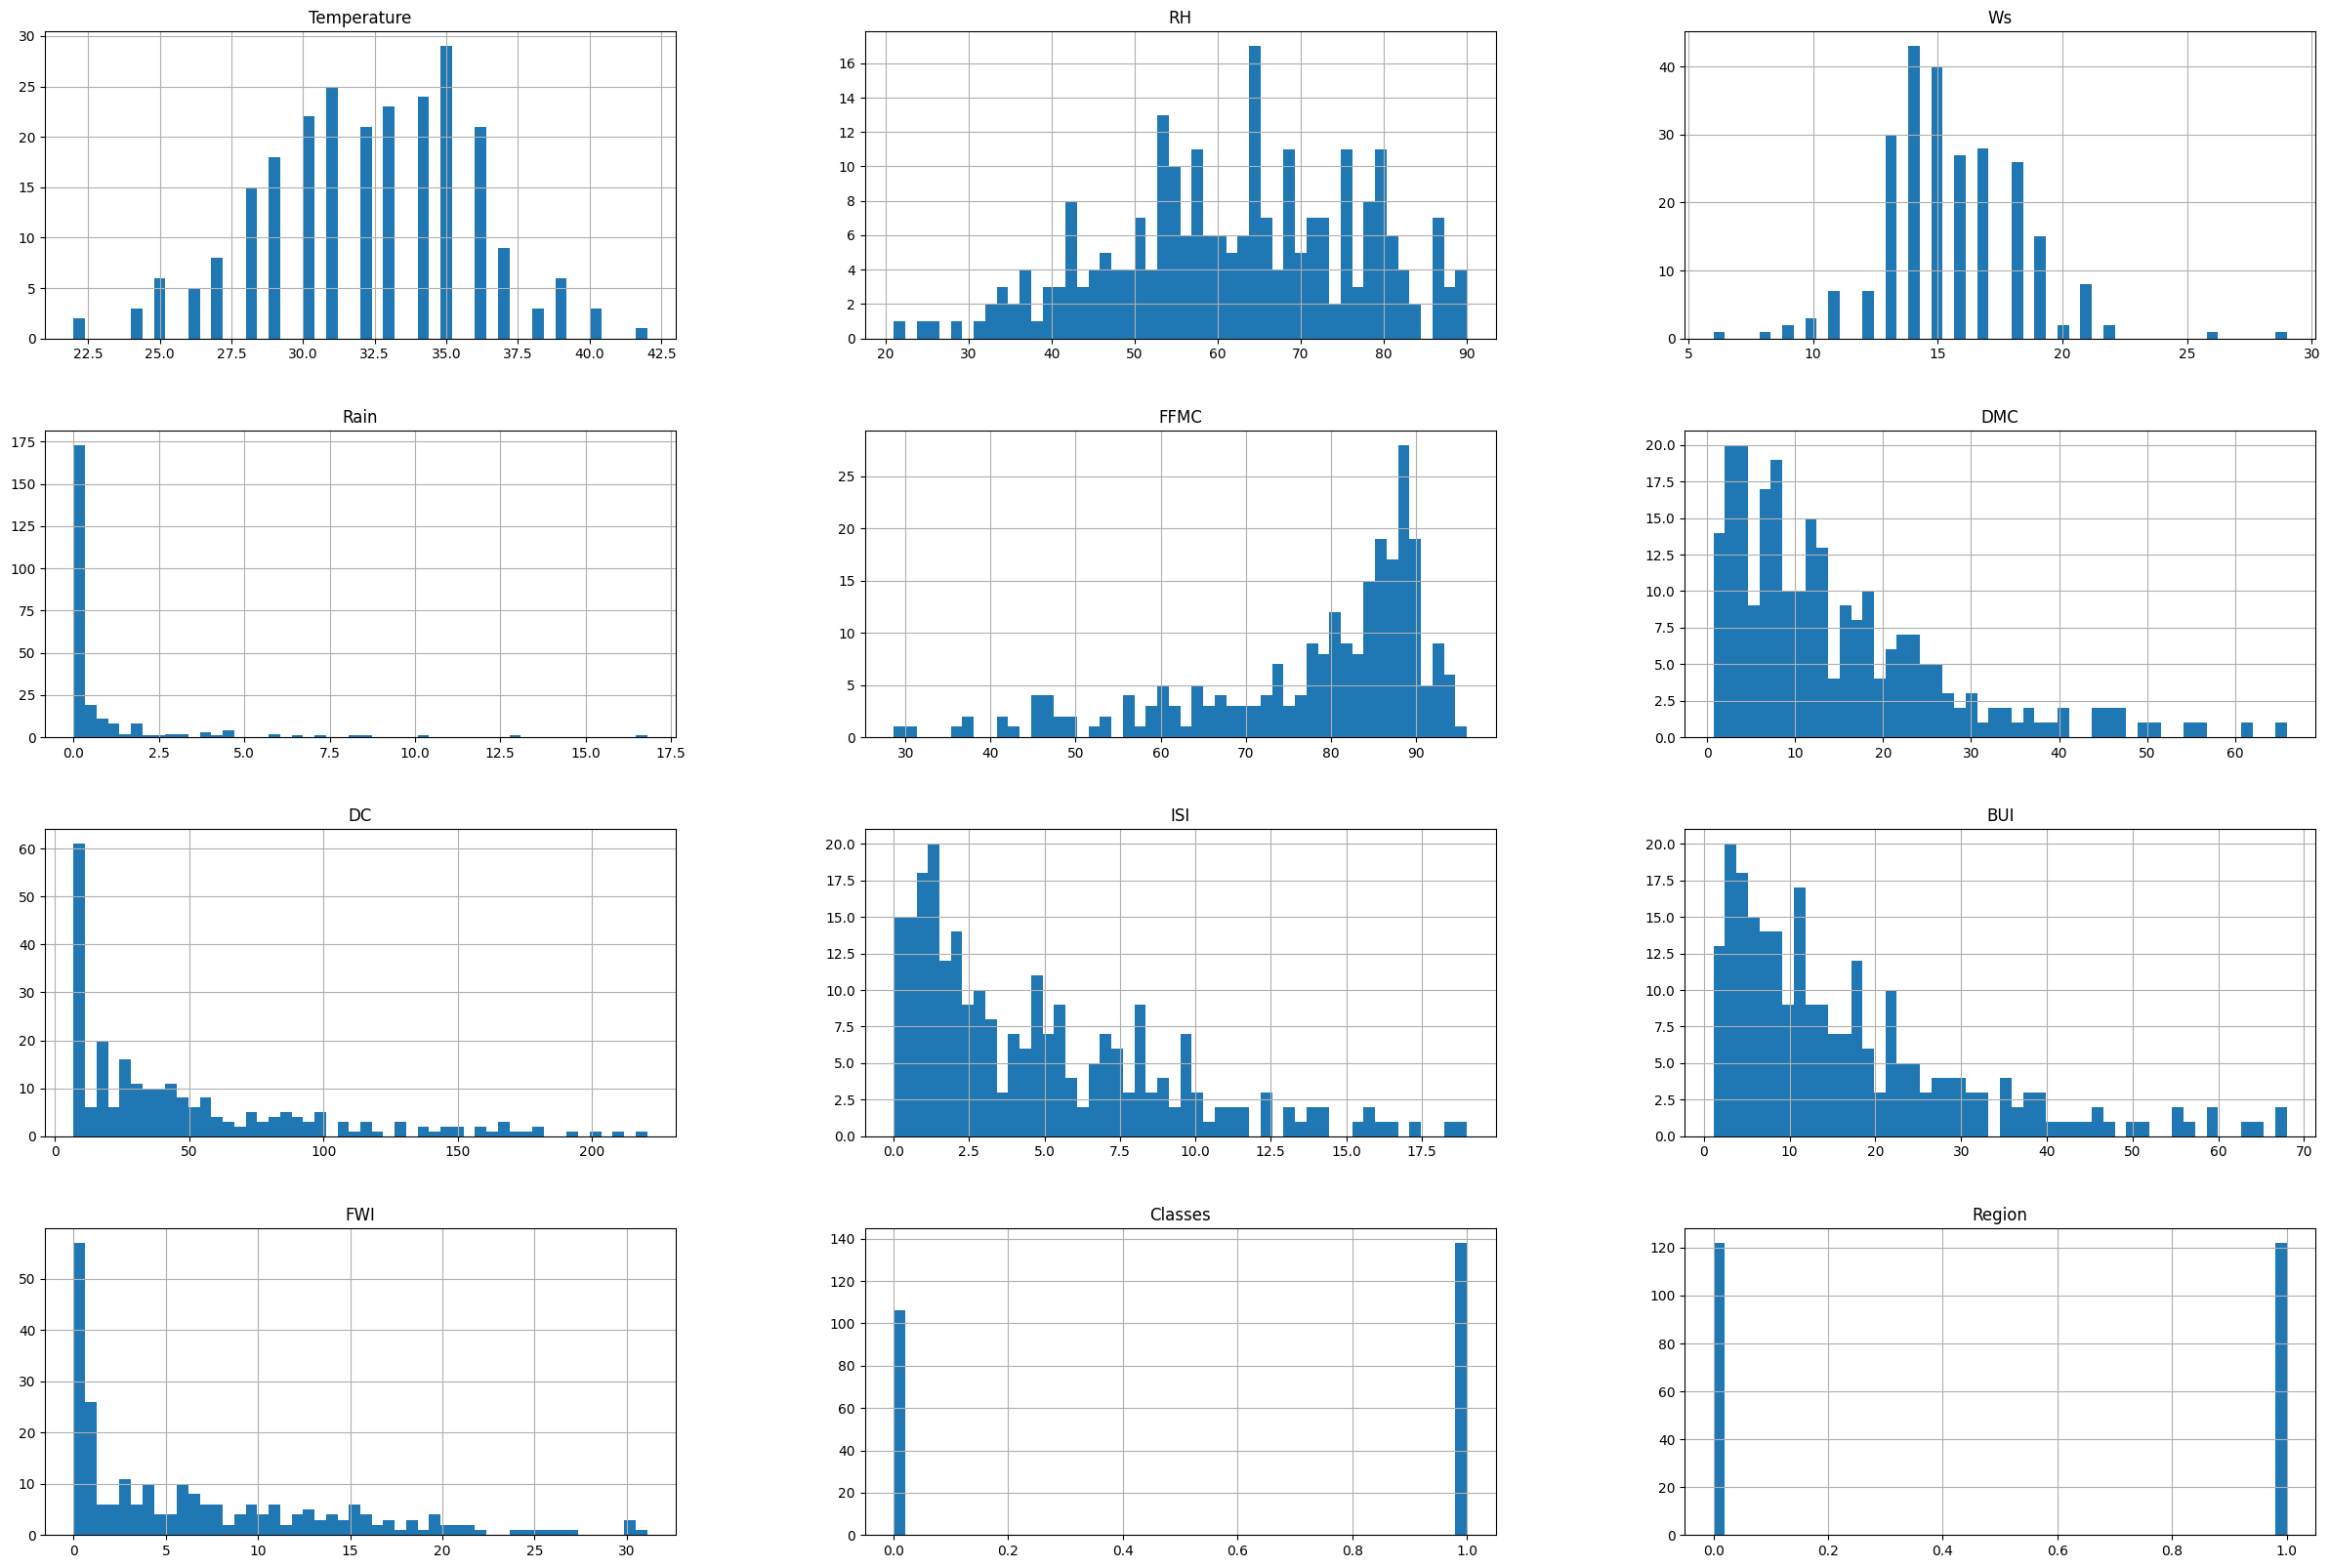

In [196]:
# U can directly draw histogram for all features
df.hist(bins=50 ,figsize=(30,20))

In [197]:
# Percentage of pie chart
#normalize true gives in percentage
percentages=df['Classes'].value_counts(normalize=True)

([<matplotlib.patches.Wedge at 0x211a05cde70>,
 [Text(-1.0767412933256737, -0.2250070826604261, 'Fire'),
  Text(1.0767412200090027, 0.2250074335072606, 'Not Fire')],
 [Text(-0.5873134327230947, -0.12273113599659605, '56.6%'),
  Text(0.5873133927321833, 0.12273132736759668, '43.4%')])

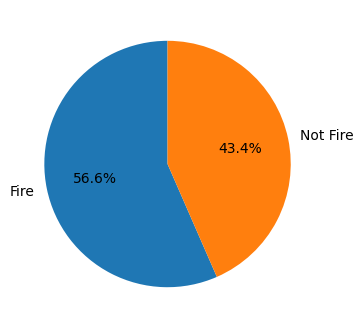

In [198]:
import matplotlib.pyplot as plt
classLabels=["Fire","Not Fire"]
plt.figure(figsize=(12, 4))
plt.pie(percentages,labels=classLabels,autopct='%1.1f%%',startangle=90)

In [165]:
## Correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.562682,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.575189,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.031109,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.323919,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.689100,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875827,0.584188
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.913644,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.858034,0.583882
FWI,0.562682,-0.575189,0.031109,-0.323919,0.689100,0.875827,0.739521,0.913644,0.858034,1.000000,0.716740


<Axes: >

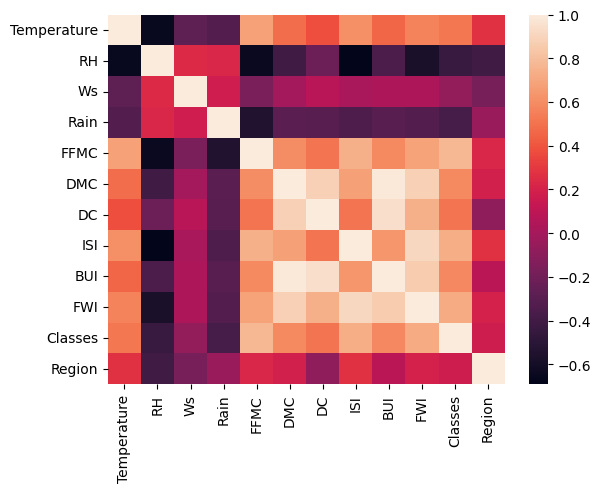

In [199]:
# Generating heatmap
sns.heatmap(df.corr())

<Axes: xlabel='Classes', ylabel='FWI'>

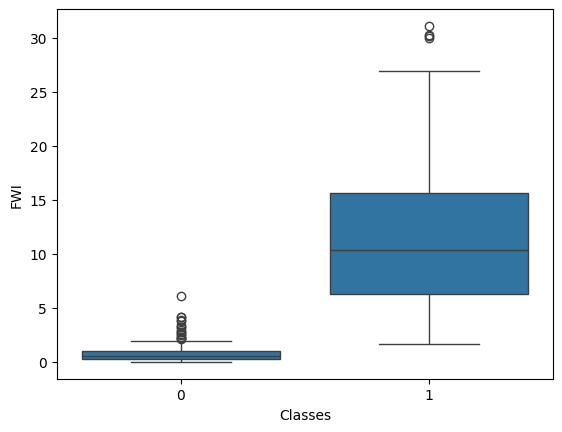

In [200]:
## Box Plot
sns.boxplot(y=df['FWI'],x=df["Classes"])

In [ ]:
cleanedDF=pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")
cleanedDF["Classes"]=np.where(cleanedDF['Classes'].str.strip().str.lower()=='not fire',0,1)
df.head()
dataRegion1=cleanedDF[cleanedDF['Region']==1]
dataRegion0=cleanedDF[cleanedDF['Region']==0]

<Axes: title={'center': 'Fire Analysis of Brjaia Regions'}, xlabel='Months', ylabel='Number of Fires'>

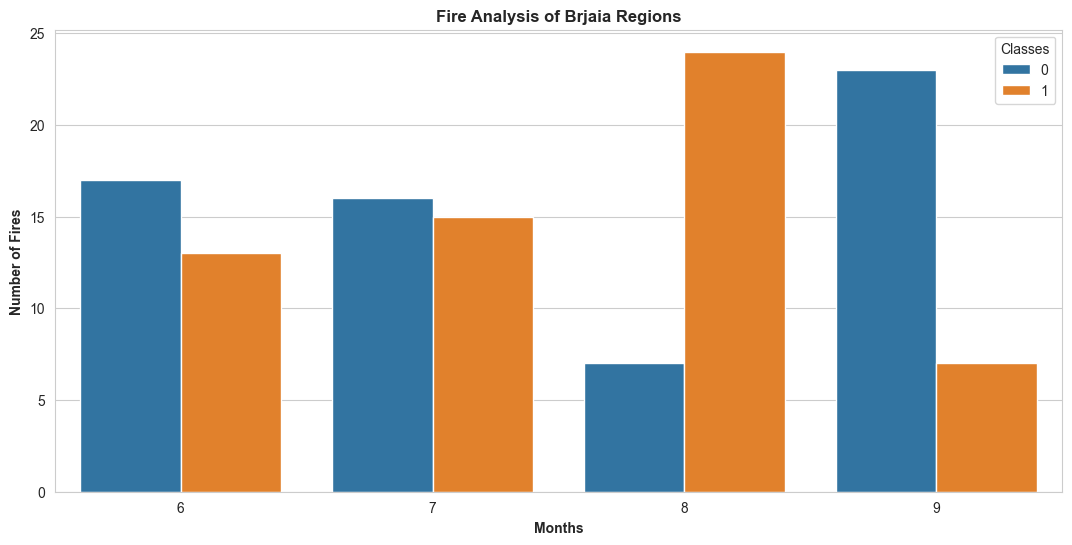

In [207]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')

plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')
sns.countplot(x='month',hue='Classes',data=dataRegion0)

<Axes: title={'center': 'Fire Analysis of Sidi- Bel Regions'}, xlabel='Months', ylabel='Number of Fires'>

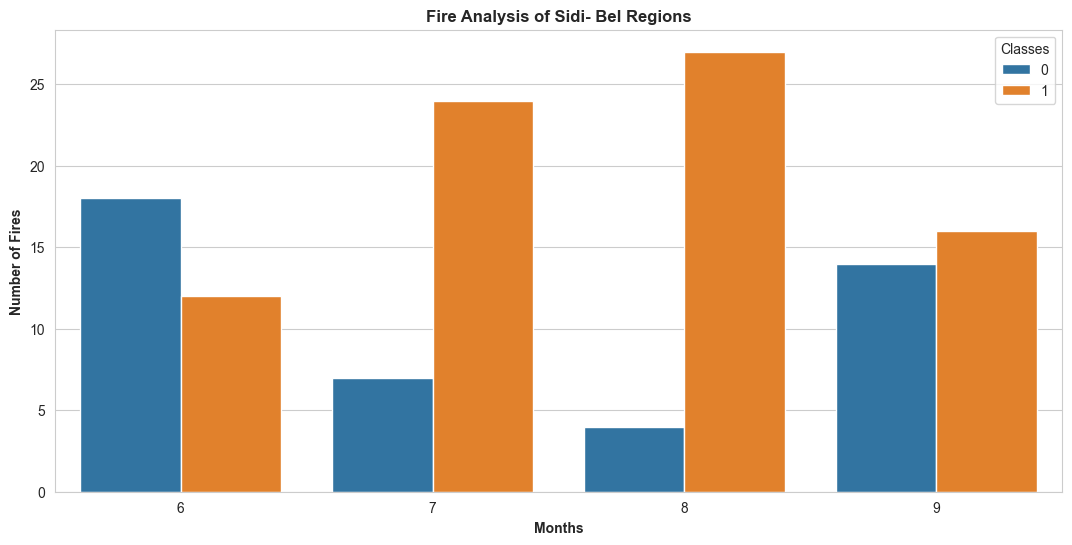

In [208]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')

plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')
sns.countplot(x='month',hue='Classes',data=dataRegion1)

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September